In [ ]:

from langgraph.graph import StateGraph, START, END, MessagesState


##definicion de message messages: Annotated[list[BaseMessage], add]

class State(MessagesState): ##estados o mencionaod como memoria compartida key messages automaticamente agregado
    customer_name:str
    phone_number:str
    email:str
    tone:str
    sentiment:str
    my_age:str


In [ ]:
def conversation(state:State)->State:
    
    new_state:State={}
    
    history = state["messages"]  ##accedo a la lista de mensajes en el estado
    if history == []:
        ai_message = llm.invoke([("system", SYSTEM_PROMPT)]) ##si no hay mensajes previos, envío un mensaje de sistema y un mensaje humano vacío
    else:
        customer_name=state.get("customer_name","jose manuel")
        if customer_name:
            last_message = history[-1]
            
            ai_message = llm.invoke([("system", SYSTEM_PROMPT),("user", last_message.text)]) ##envío la lista de mensajes al llm
        else:
            ai_message = llm.invoke([("system", SYSTEM_PROMPT)]) ##envío la lista de mensajes al llm

    new_state["messages"]=[ai_message]  ##actualizo la lista de mensajes en el estado con la respuesta del llm
    return new_state


def node_1(state:State)->State:
    new_state:State={}
    new_state["tone"]=state.get("tone","formal")
    return new_state

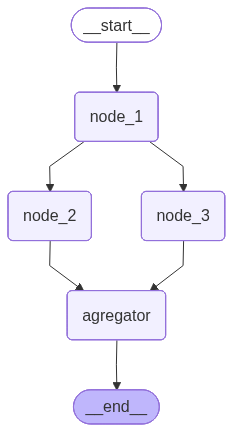

In [ ]:
def node_1(state):
    
    return {"tone": "formal"}

def node_2(state):
    return {"sentiment": "positive"}

def node_3(state):
    return {"my_age": "35"}
def node_4(state):
    return {
        "final_message": (
            f"Customer Name: {state['customer_name']}\n"
            f"Phone Number: {state['phone_number']}\n"
            f"Email: {state['email']}\n"
            f"Tone: {state['tone']}\n"
            f"Sentiment: {state['sentiment']}\n"
            f"Age: {state['my_age']}"
        )
    }

from langgraph.graph import StateGraph,START, END

builder = StateGraph(State)

builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)
builder.add_node("agregator", node_4)


builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_1", "node_3")

builder.add_edge("node_2", "agregator")
builder.add_edge("node_3", "agregator")
builder.add_edge("agregator", END)

agent = builder.compile()

from IPython.display import display, Image

display(Image(agent.get_graph().draw_mermaid_png()))

In [7]:
initial_state = {
    "customer_name": "",
    "phone_number": "",
    "email": "",
    "tone": "",        # se sobrescribe en node_1
    "sentiment": "",   # se setea en node_2
    "my_age": "",      # se setea en node_3
}

result = agent.invoke(initial_state)

In [8]:
result

{'messages': [],
 'customer_name': '',
 'phone_number': '',
 'email': '',
 'tone': 'formal',
 'sentiment': 'positive',
 'my_age': '35'}